In [109]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from pandas_profiling import ProfileReport

path = os.getcwd()
df_test = pd.read_csv(path + '/test.csv')
df_train = pd.read_csv(path + '/train.csv')

In [110]:
profile_train = ProfileReport(df_train, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [111]:
profile_train.to_widgets()

In [112]:
class EDA:

    def __init__(self,train,test):
        self.train = train
        self.test = test
    
    def dimension(self):
        print("=====Test Data=====")
        print('Dimension = {}'.format(self.test.shape))
        print('Data type \n{}'.format(self.test.dtypes))
        print("\n")
        print("=====Train Data=====")
        print('Dimension = {}'.format(self.train.shape))
        print('Data type \n{}'.format(self.train.dtypes))
    
    def drop(self,features):
        '''drop features both on train and test data'''
        '''if more than 1 feature use [feature1,feature2]'''
        self.train.drop(features,axis=1,inplace=True)
        self.test.drop(features,axis=1,inplace=True)
    
    def missing_data(self,data):
        if data == 'test':
            print("=====Test Data=====")
            missing = pd.DataFrame(self.test.isna().sum())
            missing.reset_index(level = 0, inplace = True)
            missing.columns = ['Column Name', 'Total Missing Values']
            missing = missing.sort_values(by = 'Total Missing Values', ascending = False)
            print(missing)
        elif data == 'train':
            print("=====Train Data=====")
            missing = pd.DataFrame(self.train.isna().sum())
            missing.reset_index(level = 0, inplace = True)
            missing.columns = ['Column Name', 'Total Missing Values']
            missing = missing.sort_values(by = 'Total Missing Values', ascending = False)
            print(missing)
    def train_graph(self,types):
        '''types = cat (categorical) / num (numerical)'''
        if types == 'cat':
            cat = self.train.select_dtypes(include = ['object'])
            for column in cat.columns: 
                sns.set()
                fig, ax = plt.subplots()
                sns.countplot(x=column, data=cat) 
                fig.set_size_inches(5,3)
        elif types == 'num':
            num = self.train.select_dtypes(include = ['int64', 'float64']).dropna()
            for column in num.columns:
                sns.set()
                fig, ax = plt.subplots()
                sns.distplot(num[column], kde = False)
                fig.set_size_inches(5, 3)
    def cor_matrix(self):
        '''corelation only for train data'''
        fig, ax = plt.subplots()
        sns.heatmap(self.train.corr(), linewidths=.5)
        fig.set_size_inches(10,7)
        ax.set_title("Corelation of Training Data")

In [113]:
EDA = EDA(df_train,df_test)

In [114]:
EDA.dimension()

=====Test Data=====
Dimension = (367, 12)
Data type 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object


=====Train Data=====
Dimension = (614, 13)
Data type 
Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [115]:
EDA.drop("Loan_ID")

In [116]:
EDA.missing_data('train')
EDA.missing_data('test')

=====Train Data=====
          Column Name  Total Missing Values
9      Credit_History                    50
4       Self_Employed                    32
7          LoanAmount                    22
2          Dependents                    15
8    Loan_Amount_Term                    14
0              Gender                    13
1             Married                     3
3           Education                     0
5     ApplicantIncome                     0
6   CoapplicantIncome                     0
10      Property_Area                     0
11        Loan_Status                     0
=====Test Data=====
          Column Name  Total Missing Values
9      Credit_History                    29
4       Self_Employed                    23
0              Gender                    11
2          Dependents                    10
8    Loan_Amount_Term                     6
7          LoanAmount                     5
1             Married                     0
3           Education              

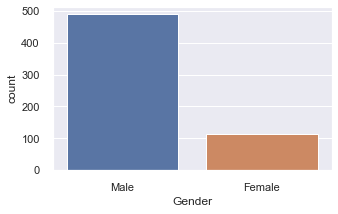

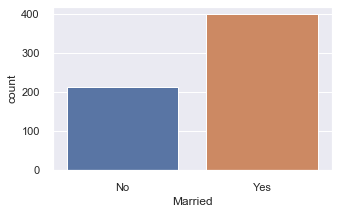

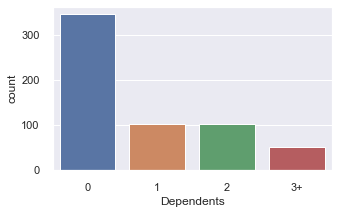

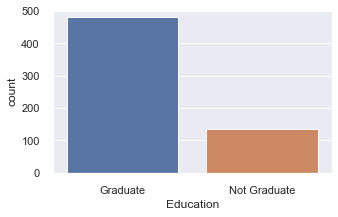

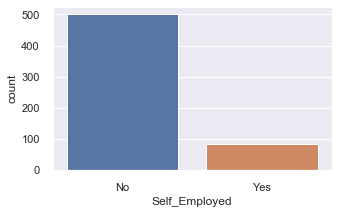

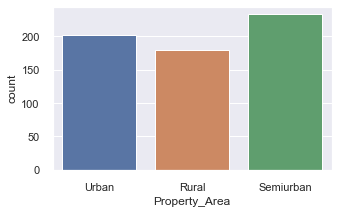

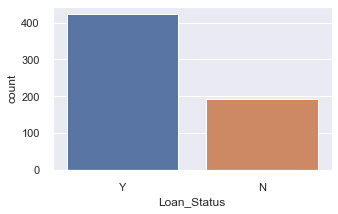

In [117]:
EDA.train_graph('cat')

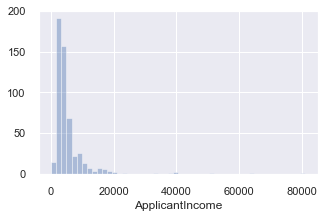

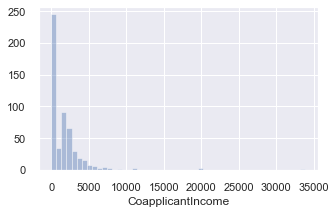

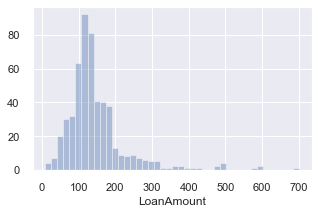

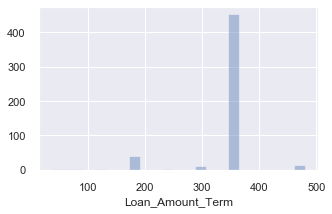

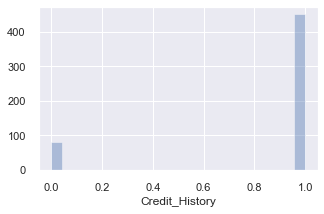

In [118]:
EDA.train_graph('num')

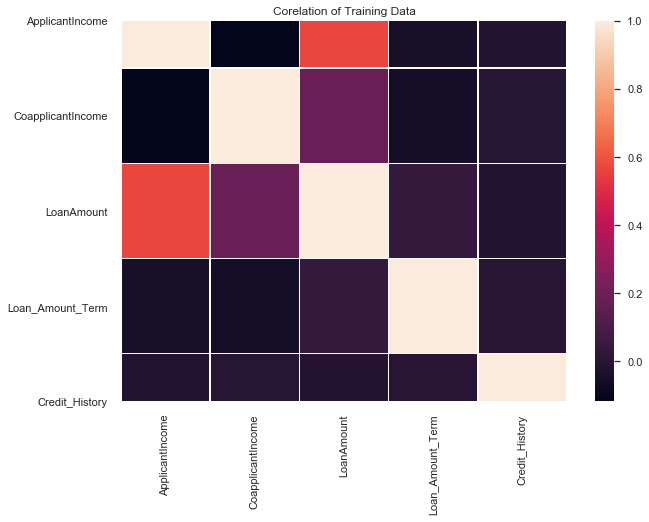

In [119]:
EDA.cor_matrix()